In [1]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
from scipy.signal import find_peaks

import OrbitalMotion as om

In [2]:
# Example from Tutorial
# https://www.stjarnhimlen.se/comp/tutorial.html#5
d = om.OrbitalMotion.date(19, 4.0, 1990)
sun_arr = om.OrbitalMotion.sunPos(d)
merc_arr = om.OrbitalMotion.getPlanPos(1, d)
# Heliocentric
print(merc_arr)
merc_geo = om.OrbitalMotion.togeo(sun_arr, merc_arr)
#print(merc_geo)
mer_geo_eq = om.Coordinates.ecEq(merc_geo[0], merc_geo[1], merc_geo[2], sun_arr[11])
print(mer_geo_eq[0], mer_geo_eq[1], mer_geo_eq[2])

(-0.3678208693993782, 0.06108452909848424, 0.03869908805497192, 170.57086510954457, 5.925527266740486, 0.37486148252012297)
0.5132266546425799 0.48296234260038473 0.25158260486587974


In [11]:
"""
    Collecting data for two planets starting at 
    date value d and continuing for const days
"""
d = 0.0
const = 365*13
# x,y,z equatorial coordinates
p1 = np.zeros((3, const))
p2 = np.zeros((3, const))
for i in range (const):
    sun_arr = om.OrbitalMotion.sunPos(d)
    p1_arr = om.OrbitalMotion.getPlanPos(1, d)
    p2_arr = om.OrbitalMotion.getPlanPos(4, d)
    
    p1_geo = om.OrbitalMotion.togeo(sun_arr, p1_arr)
    p1_geo_eq = om.Coordinates.ecEq(p1_geo[0], p1_geo[1], p1_geo[2], sun_arr[11])
    p1[0][i] = p1_geo_eq[0]
    p1[1][i] = p1_geo_eq[1]
    p1[2][i] = p1_geo_eq[2]

    p2_geo = om.OrbitalMotion.togeo(sun_arr, p2_arr)
    p2_geo_eq = om.Coordinates.ecEq(p2_geo[0], p2_geo[1], p2_geo[2], sun_arr[11])
    p2[0][i] = p2_geo_eq[0]
    p2[1][i] = p2_geo_eq[1]
    p2[2][i] = p2_geo_eq[2]
    d += 1

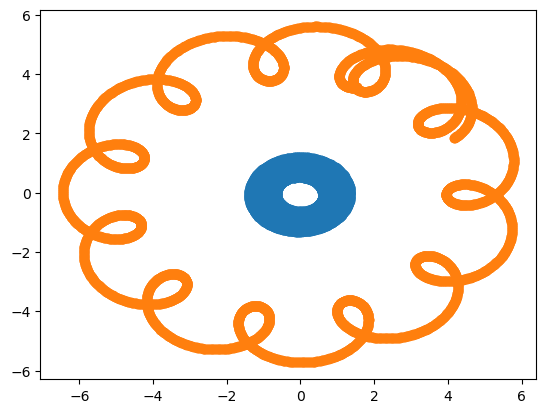

In [13]:
plt.plot(p1[0], p1[1], 'o')
plt.plot(p2[0], p2[1], 'o')

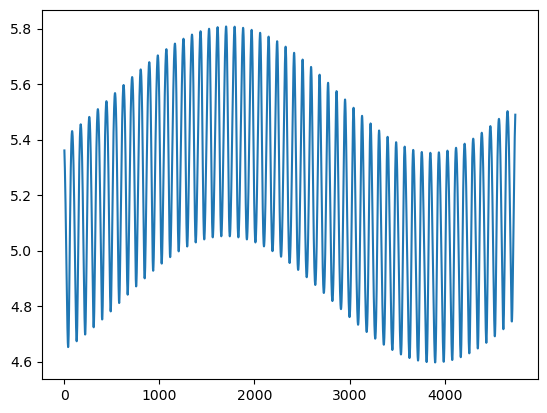

In [14]:
mag = np.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2 + (p1[2] - p2[2]) ** 2 )
plt.plot(np.arange(0, const), mag)

(array([  53,  105,  107,  159,  161,  213,  215,  267,  279,  323,  375,
        379,  431, 4314, 4366, 4370, 4422, 4466, 4478, 4530, 4532, 4584,
       4586, 4638, 4640, 4692], dtype=int64), {})


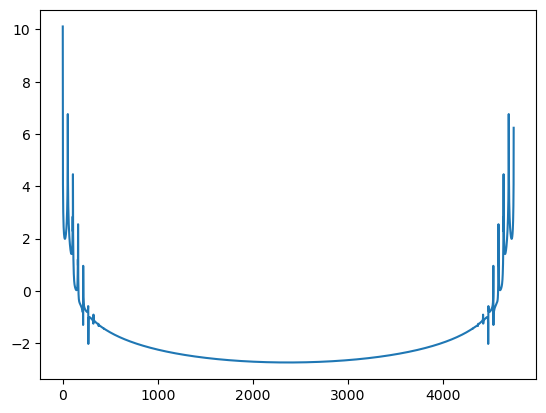

In [15]:
y = fft(mag)
z =np.log(abs(y))
plt.plot(z)
z1 = find_peaks(z)
print(z1)